# Import libaries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
import numpy as np
import cv2
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.utils import to_categorical

# Preprocessing

In [2]:
#Load dataset CIFAR-10
(feature_train, label_train), (feature_test, label_test) = tf.keras.datasets.cifar10.load_data()

#Normalisasi value dari array
feature_train  = feature_train/255
feature_test  = feature_test/255


# CNN

In [8]:
# 3 Layer Convolutional(32,64,64) dengan Max Pooling sebanyak 2 kali(2,2)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# 1 Layer Hidden dengan 64 neuron. Layer output sebanyak 10 neuron karena 10 class
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

# Menggunakan Sparse Categorical Crossentropy karena 10 class. Menggunakan Sparse karena output menggunakan label bukan binary
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [9]:
# Epoch 10
history = model.fit(feature_train, label_train, epochs=10, 
                    validation_data=(feature_test, label_test))

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.5321 - accuracy: 0.4378 - val_loss: 1.2635 - val_accuracy: 0.5500
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1431 - accuracy: 0.5949 - val_loss: 1.0842 - val_accuracy: 0.6129
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.0051 - accuracy: 0.6460 - val_loss: 1.0273 - val_accuracy: 0.6323
Epoch 4/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9144 - accuracy: 0.6773 - val_loss: 0.9959 - val_accuracy: 0.6557
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8383 - accuracy: 0.7076 - val_loss: 0.8918 - val_accuracy: 0.6910
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7785 - accuracy: 0.7277 - val_loss: 0.9028 - val_accuracy: 0.6907
Epoch 7/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7281 - accuracy: 0.7446 - val_loss: 0.8682 -

In [10]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [13]:
# Menampilkan val_loss terkecil dengan dataframe
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,accuracy,val_loss,val_accuracy,epoch
7,0.680813,0.76226,0.868084,0.7061,7
6,0.728128,0.74464,0.868220,0.7052,6
4,0.838285,0.70762,0.891802,0.6910,4
8,0.638853,0.77618,0.896920,0.7056,8
5,0.778538,0.72766,0.902806,0.6907,5
9,0.601448,0.78842,0.922310,0.6959,9
3,0.914418,0.67734,0.995873,0.6557,3
2,1.005128,0.64604,1.027283,0.6323,2
1,1.143105,0.59488,1.084188,0.6129,1
0,1.532094,0.43776,1.263471,0.5500,0


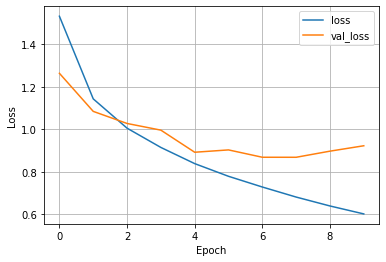

In [12]:
plot_loss(history)

# Hasil

Dari sorting value dataframe didapat val_loss terendah adalah pada epoch 7, dan sejalan dengan yang ditampilkan pada plot history dimana titik terendah mengarah pada epoch 7

Epoch : 7

Loss : 	0.680813

Accuracy : 0.76226

Val_Loss : 0.868084	

Val_Accuracy : 0.7061